# Using the halo mas function emulator

This notebook shows how to initialize the halo mass function emulator and use it to predict a mass function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rc("text", usetex=True)
plt.rc("font", size=18, family='serif')

In [3]:
import hmf

In [4]:
#Make an emulator
e = hmf.hmf_emulator()

In [5]:
#Create a cosmology dictionary and set the cosmology
cosmology={
    "omega_b": 0.027,
    "omega_cdm": 0.114,
    "w0": -0.82,
    "n_s": 0.975,
    "ln10As": 3.09,
    "H0": 65.,
    "N_eff": 3.
}
e.set_cosmology(cosmology)

In [6]:
#Get the mass function dn/dM at some masses and redshift
Masses = np.logspace(12, 15)
redshift = 1.0
dndM = e.dndM(Masses, redshift)

Text(0,0.5,'$\\frac{{\\rm d}n}{{\\rm d}M}$')

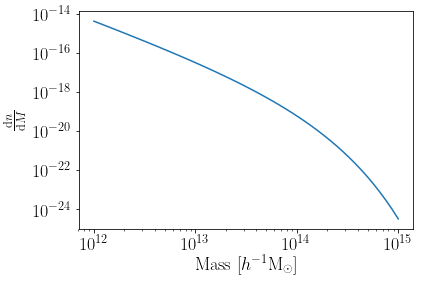

In [7]:
plt.loglog(Masses, dndM)
plt.xlabel(r"${\rm Mass}\ [h^{-1}{\rm M}_\odot]$")
plt.ylabel(r"$\frac{{\rm d}n}{{\rm d}M}$")

In [8]:
#Or at an array of redshifts
redshifts = [0.0, 1.0, 2.0]
dndMs = e.dndM(Masses, redshifts)

Text(0,0.5,'$\\frac{{\\rm d}n}{{\\rm d}M}$')

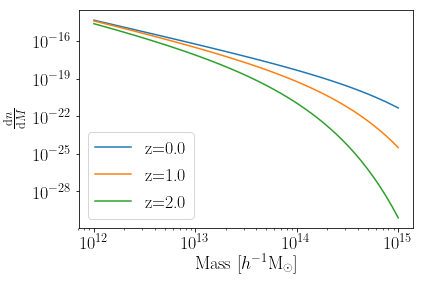

In [9]:
for i,z in enumerate(redshifts):
    plt.loglog(Masses, dndMs[i], label="z=%.1f"%z)
plt.legend()
plt.xlabel(r"${\rm Mass}\ [h^{-1}{\rm M}_\odot]$")
plt.ylabel(r"$\frac{{\rm d}n}{{\rm d}M}$")

In [10]:
Mass_bin_edges = [1e13, 5e13, 1e14, 5e14, 1e15]
redshift = 0
n_in_bins = e.n_in_bins(Mass_bin_edges, redshift)

Text(0,0.5,'Number of halos')

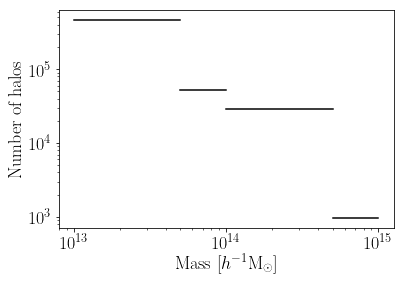

In [11]:
#Or compute the number density of halos in bins
survey_volume = 1000**3 #Mpc/h ^3, a Gpc survey
N_in_bins = n_in_bins * survey_volume
for i in range(len(Mass_bin_edges) - 1):
    x = [Mass_bin_edges[i], Mass_bin_edges[i+1]]
    y = [N_in_bins[i], N_in_bins[i]]
    plt.loglog(x, y, "k-")
plt.xlabel(r"${\rm Mass}\ [h^{-1}{\rm M}_\odot]$")
plt.ylabel(r"Number of halos")

In [12]:
Mass_bin_edges = [1e13, 5e13, 1e14, 5e14, 1e15]
redshifts = [0, 1, 2]
n_in_bins = e.n_in_bins(Mass_bin_edges, redshifts)

Text(0,0.5,'Number of halos')

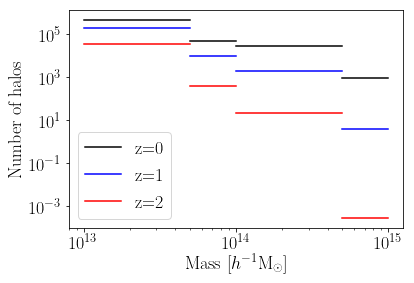

In [13]:
N_in_bins = n_in_bins * survey_volume
colors = ['k', 'b', 'r']
for j,z in enumerate(redshifts):
    for i in range(len(Mass_bin_edges) - 1):
        x = [Mass_bin_edges[i], Mass_bin_edges[i+1]]
        y = [N_in_bins[j, i], N_in_bins[j, i]]
        if i == 0:
            plt.loglog(x, y, "-", color=colors[j], label="z=%.0f"%z)
        else:
            plt.loglog(x, y, "-", color=colors[j])
plt.legend()
plt.xlabel(r"${\rm Mass}\ [h^{-1}{\rm M}_\odot]$")
plt.ylabel(r"Number of halos")